In [8]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
import py3Dmol
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [9]:
penicillinA_mol = Chem.MolFromMolFile('penicillinA.mol')
penicillinG_mol = Chem.MolFromMolFile('penicillinG.mol')
caffeine_mol = Chem.MolFromMolFile('caffeine.mol')

In [10]:
# Get the number of atoms
num_atoms = caffeine_mol.GetNumAtoms()

# Initialize an empty adjacency matrix
adjacency_matrix = np.zeros((num_atoms, num_atoms), dtype=int)

# Fill the adjacency matrix
for bond in caffeine_mol.GetBonds():
    begin = bond.GetBeginAtomIdx()
    end = bond.GetEndAtomIdx()
    bond_type = bond.GetBondTypeAsDouble()  # Get bond order as a double
    adjacency_matrix[begin][end] = bond_type
    adjacency_matrix[end][begin] = bond_type  #

# The adjacency_matrix now represents your molecule's structure
print(adjacency_matrix)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 2]
 [0 0 0 0 0 0 1 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 2 0]
 [0 0 0 0 1 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0]]


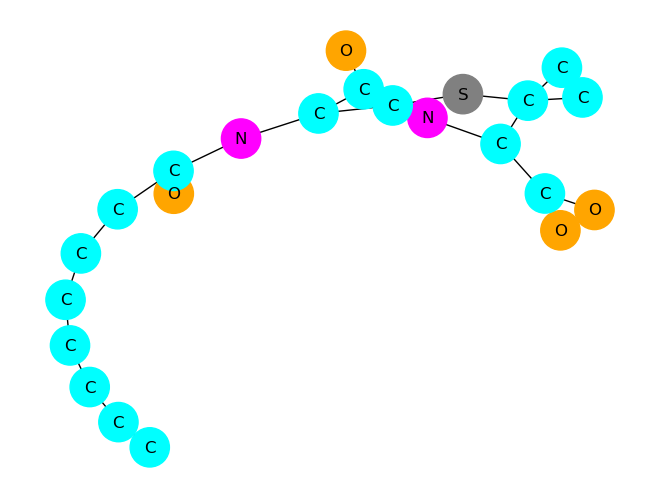

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [11]:
# define the function for coverting rdkit object to networkx object -----------     
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G

# conver rdkit object to networkx object --------------------------------------
caffeine_nx = mol_to_nx(penicillinA_mol)

caffeine_atom = nx.get_node_attributes(caffeine_nx, 'atom_symbol')

color_map = {'C': 'cyan',
             'O': 'orange',
             'N': 'magenta'}  

caffeine_colors = []
for idx in caffeine_nx.nodes():
    if (caffeine_nx.nodes[idx]['atom_symbol'] in color_map):
        caffeine_colors.append(color_map[caffeine_nx.nodes[idx]['atom_symbol']])
    else:
        caffeine_colors.append('gray')
    

nx.draw(caffeine_nx, labels=caffeine_atom, with_labels=True, node_color=caffeine_colors, node_size=800)
plt.show()

# Print out the adjacency matrix
matrix = nx.to_numpy_array(caffeine_nx)
print(matrix)

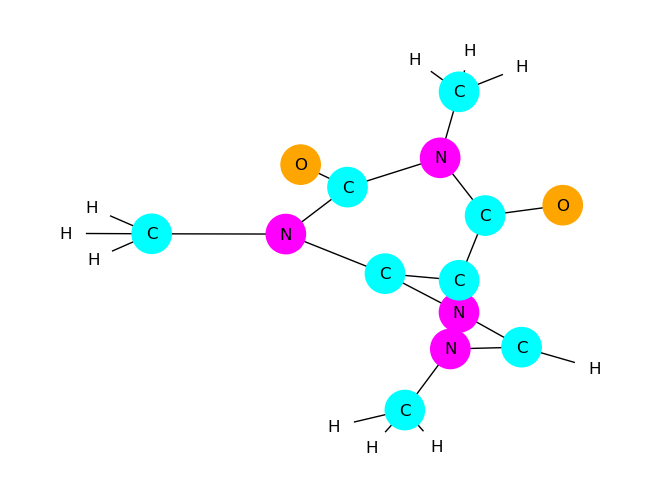

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.

In [12]:
from rdkit import Chem
import networkx as nx
import matplotlib.pyplot as plt

# Function to convert RDKit molecule to NetworkX graph with explicit hydrogens
def mol_to_nx_with_hydrogens(mol):
    mol_with_hydrogens = Chem.AddHs(mol)  # Add explicit hydrogens
    G = nx.Graph()

    for atom in mol_with_hydrogens.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol_with_hydrogens.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G

# Assuming 'caffeine_mol' is your RDKit molecule object
caffeine_nx_with_h = mol_to_nx_with_hydrogens(caffeine_mol)

# Rest of your visualization code here, adapted for the new graph
caffeine_atom = nx.get_node_attributes(caffeine_nx_with_h, 'atom_symbol')

color_map = {'C': 'cyan', 'O': 'orange', 'N': 'magenta', 'H': 'white'}

caffeine_colors = []
for idx in caffeine_nx_with_h.nodes():
    atom_symbol = caffeine_nx_with_h.nodes[idx]['atom_symbol']
    caffeine_colors.append(color_map.get(atom_symbol, 'gray'))

nx.draw(caffeine_nx_with_h, labels=caffeine_atom, with_labels=True, node_color=caffeine_colors, node_size=800)
plt.show()

# Print out the adjacency matrix for the graph with hydrogens
matrix_with_h = nx.to_numpy_array(caffeine_nx_with_h)
print(matrix_with_h)


In [13]:
import numpy as np
import networkx as nx

def dfs_traversal(graph, start, depth, visited=None, path=None):
    if visited is None:
        visited = set()
    if path is None:
        path = []

    visited.add(start)

    if depth == 0:
        return [path + [start]]

    paths = []
    for neighbor in graph.neighbors(start):
        if neighbor not in visited or len(visited) < 2:  # Allows double traversal
            new_paths = dfs_traversal(graph, neighbor, depth - 1, visited.copy(), path + [start])
            paths.extend(new_paths)

    return paths

# Assuming 'caffeine_nx_with_h' is your NetworkX graph with hydrogens
paths = dfs_traversal(matrix_with_h, start=0, depth=2)

# Create a binary map
binary_map = np.zeros_like(matrix_with_h)
for path in paths:
    for i in range(len(path) - 1):
        binary_map[path[i], path[i+1]] = 1
        binary_map[path[i+1], path[i]] = 1  # Since the graph is undirected

print(binary_map)


AttributeError: 'numpy.ndarray' object has no attribute 'neighbors'